# Explore data from a BGC Argo Float

In [1]:
import numpy as np
from numpy.ma import masked_values as maval
import gsw
import xarray as xr
import pandas as pd
import os.path as op
from datetime import datetime, timedelta
from scipy.interpolate import PchipInterpolator as pchip
from scipy.signal import medfilt
import dask.array as dsar
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib import cm
import matplotlib.colors as clr
import matplotlib.ticker as tick
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import cmocean as cmocean
import os

%matplotlib inline
# not sure if I need to download all these modules for the script  
# below, just copied them over from another script. 

In [2]:
float_id = 12888
# 12888 is the float id for the float that was released with the gliders.

this is the "UW float id" for the float that was released with the 
gliders. All the SOCCOM floats (https://soccom.princeton.edu/) can be
found at ( https://www.mbari.org/science/upper-ocean-systems/chemical-sensor-group/soccom-float-visualization/)

In [3]:
# Load Float Data
data_dir = '/Users/dhruvbalwada/OneDrive/sogos_data/'
HRdir = data_dir+"data/raw/SOCCOM/manual_download/SOCCOM_HRQC_LIAR_netcdf_20191201/"
LRdir = data_dir+"data/raw/SOCCOM/manual_download/SOCCOM_LRQC_LIAR_netcdf_20191201/"

float_dic_HR = {}
float_dic_LR = {}

float_ds_HR = xr.open_dataset(HRdir + str(float_id) + "SOOCN_HRQC.nc")
float_ds_LR = xr.open_dataset(LRdir + str(float_id) + "SOOCNQC.nc")
#There is a high resolution and low resolution data set, 
# I believe the difference is in the vertical resolution.

In [4]:
float_ds_HR
# There are a lot of Data variables.

<xarray.Dataset>
Dimensions:              (NPARAMETER: 46, N_LEVELS: 558, N_PROF: 29)
Dimensions without coordinates: NPARAMETER, N_LEVELS, N_PROF
Data variables:
    Cruise               |S11 ...
    Station              (N_PROF) int32 ...
    Lon                  (N_PROF) float64 ...
    Lat                  (N_PROF) float64 ...
    Lat_QF               (N_PROF) |S1 ...
    Lat_QFA              (N_PROF) float64 ...
    Pressure             (N_PROF, N_LEVELS) float64 ...
    Pressure_QF          (N_PROF, N_LEVELS) |S1 ...
    Pressure_QFA         (N_PROF, N_LEVELS) float64 ...
    Temperature          (N_PROF, N_LEVELS) float64 ...
    Temperature_QF       (N_PROF, N_LEVELS) |S1 ...
    Temperature_QFA      (N_PROF, N_LEVELS) float64 ...
    Salinity             (N_PROF, N_LEVELS) float64 ...
    Salinity_QF          (N_PROF, N_LEVELS) |S1 ...
    Salinity_QFA         (N_PROF, N_LEVELS) float64 ...
    Sigma_theta          (N_PROF, N_LEVELS) float64 ...
    Sigma_theta_QF       (N_PROF, N_LEVELS) |S1 ...
    Sigma_theta_QFA      (N_PROF, N_LEVELS) float64 ...
    Depth                (N_PROF, N_LEVELS) float64 ...
    Depth_QF             (N_PROF, N_LEVELS) |S1 ...
    Depth_QFA            (N_PROF, N_LEVELS) float64 ...
    Oxygen               (N_PROF, N_LEVELS) float64 ...
    Oxygen_QF            (N_PROF, N_LEVELS) |S1 ...
    Oxygen_QFA           (N_PROF, N_LEVELS) float64 ...
    OxygenSat            (N_PROF, N_LEVELS) float64 ...
    OxygenSat_QF         (N_PROF, N_LEVELS) |S1 ...
    OxygenSat_QFA        (N_PROF, N_LEVELS) float64 ...
    Nitrate              (N_PROF, N_LEVELS) float64 ...
    Nitrate_QF           (N_PROF, N_LEVELS) |S1 ...
    Nitrate_QFA          (N_PROF, N_LEVELS) float64 ...
    Chl_a                (N_PROF, N_LEVELS) float64 ...
    Chl_a_QF             (N_PROF, N_LEVELS) |S1 ...
    Chl_a_QFA            (N_PROF, N_LEVELS) float64 ...
    Chl_a_corr           (N_PROF, N_LEVELS) float64 ...
    Chl_a_corr_QF        (N_PROF, N_LEVELS) |S1 ...
    Chl_a_corr_QFA       (N_PROF, N_LEVELS) float64 ...
    b_bp700              (N_PROF, N_LEVELS) float64 ...
    b_bp700_QF           (N_PROF, N_LEVELS) |S1 ...
    b_bp700_QFA          (N_PROF, N_LEVELS) float64 ...
    b_bp_corr            (N_PROF, N_LEVELS) float64 ...
    b_bp_corr_QF         (N_PROF, N_LEVELS) |S1 ...
    b_bp_corr_QFA        (N_PROF, N_LEVELS) float64 ...
    POC                  (N_PROF, N_LEVELS) float64 ...
    POC_QF               (N_PROF, N_LEVELS) |S1 ...
    POC_QFA              (N_PROF, N_LEVELS) float64 ...
    pHinsitu             (N_PROF, N_LEVELS) float64 ...
    pHinsitu_QF          (N_PROF, N_LEVELS) |S1 ...
    pHinsitu_QFA         (N_PROF, N_LEVELS) float64 ...
    pH25C                (N_PROF, N_LEVELS) float64 ...
    pH25C_QF             (N_PROF, N_LEVELS) |S1 ...
    pH25C_QFA            (N_PROF, N_LEVELS) float64 ...
    TALK_LIAR            (N_PROF, N_LEVELS) float64 ...
    TALK_LIAR_QF         (N_PROF, N_LEVELS) |S1 ...
    TALK_LIAR_QFA        (N_PROF, N_LEVELS) float64 ...
    DIC_LIAR             (N_PROF, N_LEVELS) float64 ...
    DIC_LIAR_QF          (N_PROF, N_LEVELS) |S1 ...
    DIC_LIAR_QFA         (N_PROF, N_LEVELS) float64 ...
    pCO2_LIAR            (N_PROF, N_LEVELS) float64 ...
    pCO2_LIAR_QF         (N_PROF, N_LEVELS) |S1 ...
    pCO2_LIAR_QFA        (N_PROF, N_LEVELS) float64 ...
    Type                 |S1 ...
    mon_day_yr           (N_PROF) |S10 ...
    hh_mm                (N_PROF) |S5 ...
    Parameters           (NPARAMETER) |S19 ...
    JULD                 (N_PROF) datetime64[ns] ...
    REFERENCE_DATE_TIME  object ...
Attributes:
    Comments:  \n//0\n//File updated on 11/26/2019 20:17\n//!! ADJUSTED DATA ...

In [5]:
float_ds_HR

<xarray.Dataset>
Dimensions:              (NPARAMETER: 46, N_LEVELS: 558, N_PROF: 29)
Dimensions without coordinates: NPARAMETER, N_LEVELS, N_PROF
Data variables:
    Cruise               |S11 b'    5906030'
    Station              (N_PROF) int32 1 2 3 4 5 6 7 8 ... 23 24 25 26 27 28 29
    Lon                  (N_PROF) float64 30.23 32.83 31.63 ... 43.51 44.08
    Lat                  (N_PROF) float64 -51.34 -51.07 -51.8 ... -51.05 -51.36
    Lat_QF               (N_PROF) |S1 b'0' b'0' b'0' b'0' ... b'0' b'0' b'0'
    Lat_QFA              (N_PROF) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    Pressure             (N_PROF, N_LEVELS) float64 1.799e+03 1.699e+03 ... nan
    Pressure_QF          (N_PROF, N_LEVELS) |S1 b'0' b'0' b'0' ... b'1' b'1'
    Pressure_QFA         (N_PROF, N_LEVELS) float64 0.0 0.0 0.0 ... 0.0 1.0 1.0
    Temperature          (N_PROF, N_LEVELS) float64 1.449 1.59 1.747 ... nan nan
    Temperature_QF       (N_PROF, N_LEVELS) |S1 b'0' b'0' b'0' ... b'1' b'1'
    Temperature_QFA      (N_PROF, N_LEVELS) float64 0.0 0.0 0.0 ... 0.0 1.0 1.0
    Salinity             (N_PROF, N_LEVELS) float64 34.72 34.73 ... nan nan
    Salinity_QF          (N_PROF, N_LEVELS) |S1 b'0' b'0' b'0' ... b'1' b'1'
    Salinity_QFA         (N_PROF, N_LEVELS) float64 0.0 0.0 0.0 ... 0.0 1.0 1.0
    Sigma_theta          (N_PROF, N_LEVELS) float64 27.8 27.79 27.79 ... nan nan
    Sigma_theta_QF       (N_PROF, N_LEVELS) |S1 b'0' b'0' b'0' ... b'1' b'1'
    Sigma_theta_QFA      (N_PROF, N_LEVELS) float64 0.0 0.0 0.0 ... 0.0 1.0 1.0
    Depth                (N_PROF, N_LEVELS) float64 1.776e+03 1.677e+03 ... nan
    Depth_QF             (N_PROF, N_LEVELS) |S1 b'0' b'0' b'0' ... b'1' b'1'
    Depth_QFA            (N_PROF, N_LEVELS) float64 0.0 0.0 0.0 ... 0.0 1.0 1.0
    Oxygen               (N_PROF, N_LEVELS) float64 198.8 196.9 ... nan nan
    Oxygen_QF            (N_PROF, N_LEVELS) |S1 b'0' b'0' b'0' ... b'1' b'1'
    Oxygen_QFA           (N_PROF, N_LEVELS) float64 0.0 0.0 0.0 ... 1.0 1.0 1.0
    OxygenSat            (N_PROF, N_LEVELS) float64 59.2 58.8 59.1 ... nan nan
    OxygenSat_QF         (N_PROF, N_LEVELS) |S1 b'0' b'0' b'0' ... b'1' b'1'
    OxygenSat_QFA        (N_PROF, N_LEVELS) float64 0.0 0.0 0.0 ... 1.0 1.0 1.0
    Nitrate              (N_PROF, N_LEVELS) float64 31.29 31.09 ... nan nan
    Nitrate_QF           (N_PROF, N_LEVELS) |S1 b'0' b'0' b'0' ... b'1' b'1'
    Nitrate_QFA          (N_PROF, N_LEVELS) float64 0.0 0.0 0.0 ... 1.0 1.0 1.0
    Chl_a                (N_PROF, N_LEVELS) float64 0.0037 0.0037 ... nan nan
    Chl_a_QF             (N_PROF, N_LEVELS) |S1 b'0' b'0' b'0' ... b'1' b'1'
    Chl_a_QFA            (N_PROF, N_LEVELS) float64 0.0 0.0 0.0 ... 1.0 1.0 1.0
    Chl_a_corr           (N_PROF, N_LEVELS) float64 0.0012 0.0012 ... nan nan
    Chl_a_corr_QF        (N_PROF, N_LEVELS) |S1 b'0' b'0' b'0' ... b'1' b'1'
    Chl_a_corr_QFA       (N_PROF, N_LEVELS) float64 0.0 0.0 0.0 ... 1.0 1.0 1.0
    b_bp700              (N_PROF, N_LEVELS) float64 0.000337 0.000405 ... nan
    b_bp700_QF           (N_PROF, N_LEVELS) |S1 b'1' b'1' b'1' ... b'1' b'1'
    b_bp700_QFA          (N_PROF, N_LEVELS) float64 1.0 1.0 1.0 ... 1.0 1.0 1.0
    b_bp_corr            (N_PROF, N_LEVELS) float64 nan nan nan ... nan nan nan
    b_bp_corr_QF         (N_PROF, N_LEVELS) |S1 b'1' b'1' b'1' ... b'1' b'1'
    b_bp_corr_QFA        (N_PROF, N_LEVELS) float64 1.0 1.0 1.0 ... 1.0 1.0 1.0
    POC                  (N_PROF, N_LEVELS) float64 1.13 1.31 1.39 ... nan nan
    POC_QF               (N_PROF, N_LEVELS) |S1 b'1' b'1' b'1' ... b'1' b'1'
    POC_QFA              (N_PROF, N_LEVELS) float64 1.0 1.0 1.0 ... 1.0 1.0 1.0
    pHinsitu             (N_PROF, N_LEVELS) float64 nan nan 7.909 ... nan nan
    pHinsitu_QF          (N_PROF, N_LEVELS) |S1 b'1' b'1' b'0' ... b'1' b'1'
    pHinsitu_QFA         (N_PROF, N_LEVELS) float64 1.0 1.0 0.0 ... 1.0 1.0 1.0
    pH25C                (N_PROF, N_LEVELS) float64 nan nan 7.63 ... nan nan nan
    pH25C_QF         

In [6]:
ds = float_ds_HR.isel(N_LEVELS=10)

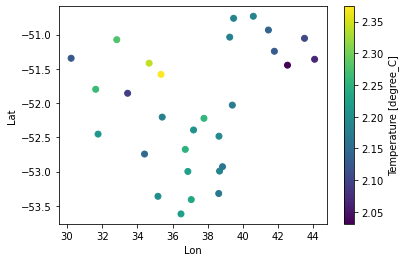

In [7]:
ds.plot.scatter(x="Lon", y="Lat", hue="Temperature")

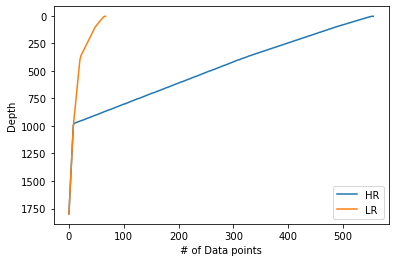

In [13]:
plt.plot(float_ds_HR.Pressure.isel(N_PROF=-1).values, label='HR')
plt.plot(float_ds_LR.Pressure.isel(N_PROF=-1).values, label='LR')
plt.legend()
plt.xlabel('# of Data points')
plt.ylabel('Depth')
plt.gca().invert_yaxis()
#Note how the full depth of profiling by the LR is covered in much fewer number of
# data points. The HR profile samples approx every 2 m in the top 1000m.

In [17]:
# Load topography
topo = xr.open_dataarray(
    data_dir+"/data/processed/ETOPO1_Ice_g_gmt4_coarsened5.nc"
)

# Load fronts

pf = pd.read_csv(
    op.join(data_dir+"data/processed/fronts/pf.txt"),
    delim_whitespace=True,
    header=None,
    dtype=float,
    names=["lon", "lat"],
)
saf = pd.read_csv(
    op.join(data_dir+"data/processed/fronts/saf.txt"),
    delim_whitespace=True,
    header=None,
    dtype=float,
    names=["lon", "lat"],
)
sbdy = pd.read_csv(
    op.join(data_dir+"data/processed/fronts/sbdy.txt"),
    delim_whitespace=True,
    nrows=1079,
    header=None,
    dtype=float,
    names=["lon", "lat"],
)

### Plot float trajectory

Text(0.5, 1.0, 'Southern Indian Ocean')

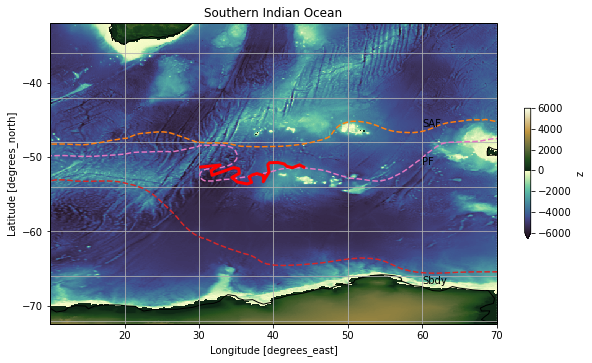

In [20]:
plt.figure(figsize=(10, 6))

ax = plt.subplot(
    111, projection=ccrs.PlateCarree()
)  # create a set of axes with Mercator projection
ax.set_xticks([20, 30, 40, 50, 60, 70], crs=ccrs.PlateCarree())
ax.set_yticks([-70, -60, -50, -40], crs=ccrs.PlateCarree())
ax.set_extent([10, 70, -70, -32])
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND)  # plot some data on them

topo.sel(y=slice(-90, -30)).sel(x=slice(10, 70)).plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cbar_kwargs={"shrink": 0.4},
    vmin=-6000,
    cmap=cmocean.cm.topo,
)

plt.plot(saf.lon, saf.lat, transform=ccrs.PlateCarree(), linestyle="--", color="C1")
plt.text(60, -46, "SAF")
plt.plot(pf.lon, pf.lat, transform=ccrs.PlateCarree(), linestyle="--", color="C6")
plt.text(60, -51, "PF")
# plt.plot(saccf.lon, saccf.lat, transform=ccrs.PlateCarree())
plt.plot(sbdy.lon, sbdy.lat, transform=ccrs.PlateCarree(), linestyle="--", color="C3")
plt.text(60, -67, "Sbdy")


ax.plot(
    float_ds_HR.Lon.values,
    float_ds_HR.Lat.values,
    "-",
    rasterized=True,
    linewidth=3, color='r'
)



ax.gridlines()
ax.set_title("Southern Indian Ocean")  
# 

### Estimate other oceanographic variables

In [21]:
# Calculate density and spice

## Add density and other things
SA = xr.apply_ufunc(
    gsw.SA_from_SP,
    float_ds_HR.Salinity,
    float_ds_HR.Pressure,
    float_ds_HR.Lon,
    float_ds_HR.Lat,
    dask="parallelized",
    output_dtypes=[float],
).rename("SA")
CT = xr.apply_ufunc(
    gsw.CT_from_t,
    SA,
    float_ds_HR.Temperature,
    float_ds_HR.Pressure,
    dask="parallelized",
    output_dtypes=[float],
).rename("CT")
SIGMA0 = xr.apply_ufunc(
    gsw.sigma0, SA, CT, dask="parallelized", output_dtypes=[float]
).rename("SIGMA0")
SPICE = xr.apply_ufunc(
    gsw.spiciness0, SA, CT, dask="parallelized", output_dtypes=[float]
).rename("SPICE")

float_ds_HR = xr.merge([float_ds_HR, SIGMA0, SPICE, SA, CT])

In [24]:
# Estimate the distances along the float trajectory
dist = gsw.distance(float_ds_HR.Lon, float_ds_HR.Lat)
distance = np.cumsum(dist)
distance = np.insert(distance, 0, 0)
float_ds_HR["distance"] = distance

Text(0, 0.5, 'Along Track Distance(km)')

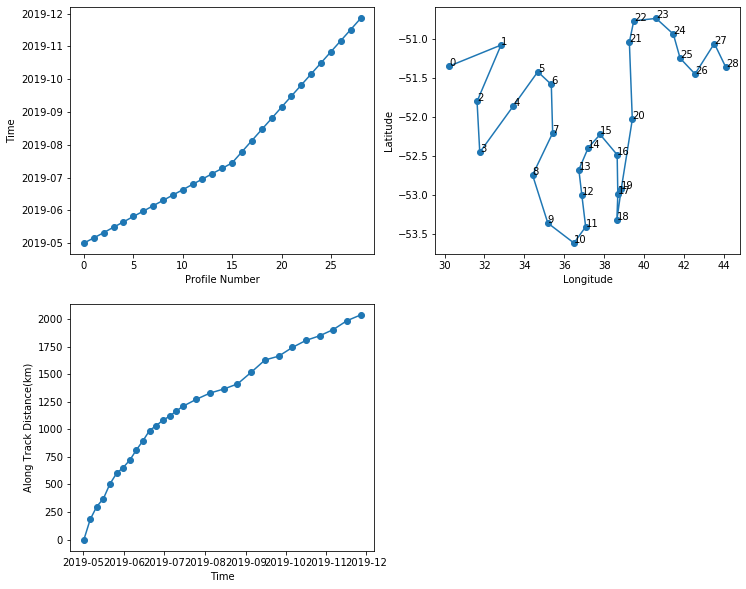

In [25]:
# Plot how the sampling is being done

plt.figure(figsize=(12, 10))

plt.subplot(221)
float_ds_HR.JULD.plot(Marker="o")
plt.ylabel("Time")
plt.xlabel("Profile Number")
# the faster sampling is visible for the first 15 profiles.

plt.subplot(222)
plt.plot(float_ds_HR.Lon, float_ds_HR.Lat, Marker="o")
for i in range(len(float_ds_HR.Lon)):
    plt.text(float_ds_HR.Lon[i], float_ds_HR.Lat[i], str(i))
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.subplot(223)
plt.plot(float_ds_HR.JULD, float_ds_HR.distance / 1e3, Marker="o")
plt.xlabel("Time")
plt.ylabel("Along Track Distance(km)")



### Look at some raw variables 

In [28]:
Numgrid = np.tile(float_ds_HR.N_PROF, (558, 1))
Numgrid.shape

(558, 29)

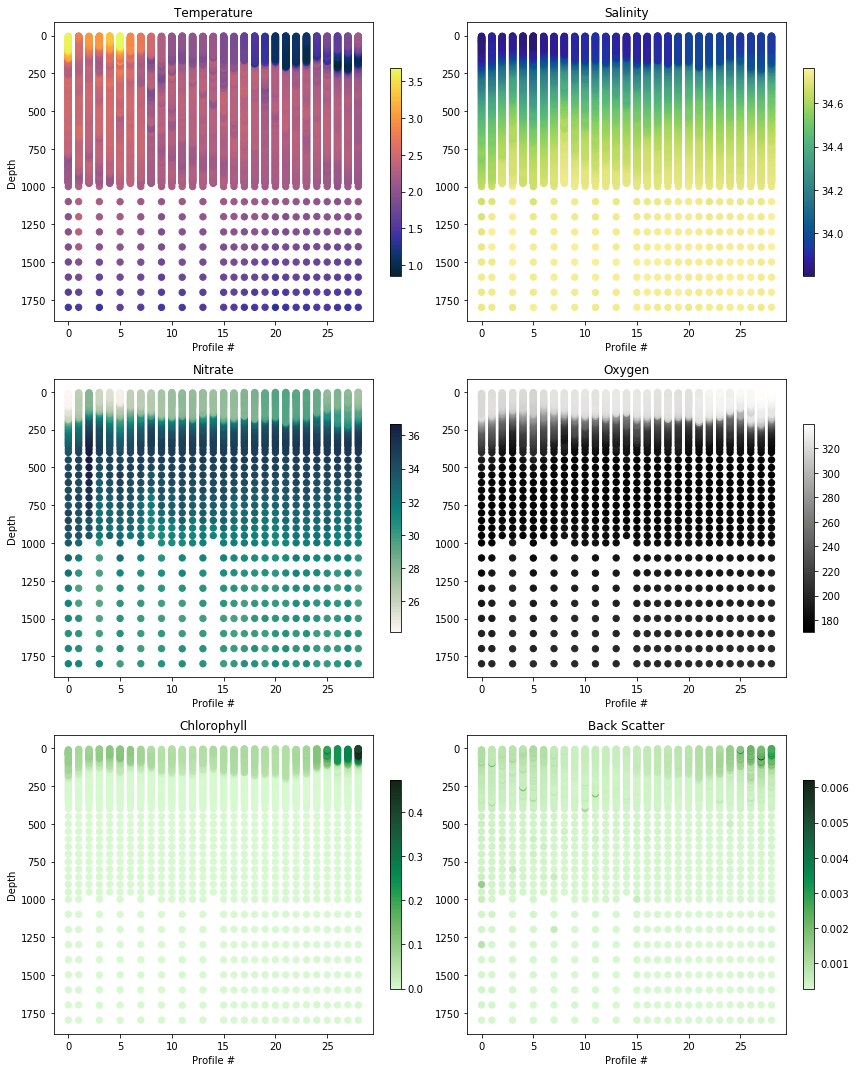

In [29]:
# raw plots : T,S, Oxygen, Nitrate, Chl_a, backscatter (b_bp700), POC, phinsitu, ph25c, TALK, DIC, pCO2
plt.figure(figsize=(12, 15))

plt.subplot(321)
plt.scatter(
    Numgrid.T, float_ds_HR.Pressure, s=40, 
    c=float_ds_HR.Temperature, cmap=cmocean.cm.thermal
)
plt.colorbar(orientation="vertical", fraction=0.03)
plt.gca().invert_yaxis()
plt.xlabel("Profile #")
plt.ylabel("Depth")
plt.title("Temperature")

plt.subplot(322)
plt.scatter(Numgrid.T, float_ds_HR.Pressure, s=40, 
            c=float_ds_HR.Salinity, cmap=cmocean.cm.haline)
plt.colorbar(orientation="vertical", fraction=0.03)
plt.gca().invert_yaxis()
plt.xlabel("Profile #")
plt.title("Salinity")

plt.subplot(323)
plt.scatter(Numgrid.T, float_ds_HR.Pressure, s=40, 
            c=float_ds_HR.Nitrate, cmap=cmocean.cm.tempo)
plt.colorbar(orientation="vertical", fraction=0.03)
plt.gca().invert_yaxis()
plt.xlabel("Profile #")
plt.ylabel("Depth")
plt.title("Nitrate")

plt.subplot(324)
plt.scatter(Numgrid.T, float_ds_HR.Pressure, s=40, 
            c=float_ds_HR.Oxygen, cmap=cmocean.cm.gray)
plt.colorbar(orientation="vertical", fraction=0.03)
plt.gca().invert_yaxis()
plt.xlabel("Profile #")
# plt.ylabel('Depth')
plt.title("Oxygen")

plt.subplot(325)
plt.scatter(
    Numgrid.T, float_ds_HR.Pressure, s=40, 
    c=float_ds_HR.Chl_a_corr, cmap=cmocean.cm.algae
)
plt.colorbar(orientation="vertical", fraction=0.03)
plt.gca().invert_yaxis()
plt.xlabel("Profile #")
plt.ylabel("Depth")
plt.title("Chlorophyll")

plt.subplot(326)
plt.scatter(Numgrid.T, float_ds_HR.Pressure, s=40, 
            c=float_ds_HR.b_bp700, cmap=cmocean.cm.algae)
plt.colorbar(orientation="vertical", fraction=0.03)
plt.gca().invert_yaxis()
plt.xlabel("Profile #")
# plt.ylabel('Depth')
plt.title("Back Scatter")

plt.tight_layout()

In [30]:
# Can you plot other variables and see what they look like? 